In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

C:\Users\grfor\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('Ads_Optimisation.csv')

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape[0]

10000

In [5]:
df.sum()

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [6]:
[i for i in df.mean()]

[0.1703,
 0.1295,
 0.0728,
 0.1196,
 0.2695,
 0.0126,
 0.1112,
 0.2091,
 0.0952,
 0.0489]

### Trying Epsilon Greedy to read the dataset above 

In [33]:
def simulation(df, EPS, BANDIT_PROBS, NUM_TRIALS):
    
    #initialize the NUM_TRIALS, based on the no. of ROWS of dataframe
    #NUM_TRIALS = df.shape[0]
    
    # Initialize bandits with win_rate_estimate as 0, based on the no. of COLS of dataframe
    WIN_RATE_ESTIMATE = [0 for i in range(df.shape[1])]
    
    # Recording the simulation
    rewards= []
    num_times_explored=0
    num_times_exploited=0
    num_times_optimal=0
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)
    
    
    #create a dictionary of counts
    dict_count = {}
    for i in range(10):
        dict_count['arm'+str(i+1)]=0

    for i in range(NUM_TRIALS):
        # Explore Scenario
        if np.random.random()<=EPS:
            
            num_times_explored += 1
            
            # Recording the bandit(s) other than the one with highest win rate estimate
            explore_idx = [index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate != max(WIN_RATE_ESTIMATE)]
            
            # Randomly selecting a bandit from those recorded bandits 
            if explore_idx:
                bandit_selected = np.random.choice(explore_idx)
            else:
                bandit_selected = np.random.choice([0,1])
            
            #update the count
            dict_count['arm'+str(bandit_selected+1)]+=1
                
        
        # Exploit Scenario
        else:
            
            num_times_exploited += 1
            
            # Selecting the bandit with the highest win rate estimate till now
            bandit_selected = np.random.choice([index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate == max(WIN_RATE_ESTIMATE)])
            
            #update the count
            dict_count['arm'+str(bandit_selected+1)]+=1
        
        
        # Update the optimal count
        if bandit_selected==optimal_bandit:
            num_times_optimal += 1
        
        
        # Pulling the arm of the selected bandit
        try:
            reward = df.iloc[dict_count['arm'+str(bandit_selected+1)],bandit_selected] 
        except IndexError:
            reward = 0
        
        #Recording the reward
        rewards.append(reward)
        
        #Updating the win rate estimate of the selected bandit after the iteration
        WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
 # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"num_times_exploited : {num_times_exploited}")
    print(f"num_times_explored  : {num_times_explored}")
    print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.014066704676447302

Mean win rate estimate of bandit #2 : 0.032659313303012055

Mean win rate estimate of bandit #3 : 0.008723054210583782

Mean win rate estimate of bandit #4 : 0.009760205783580266

Mean win rate estimate of bandit #5 : 0.019168671932762102

Mean win rate estimate of bandit #6 : 0.0014516302354945076

Mean win rate estimate of bandit #7 : 0.005425547521353746

Mean win rate estimate of bandit #8 : 0.03744121476576493

Mean win rate estimate of bandit #9 : 0.09519930423254876

Mean win rate estimate of bandit #10 : 0.0031507426040652997

num_times_exploited : 9999
num_times_explored  : 2501
num_times_optimal   : 266
total_reward        : 1249
total_reward_%      : 9.99%


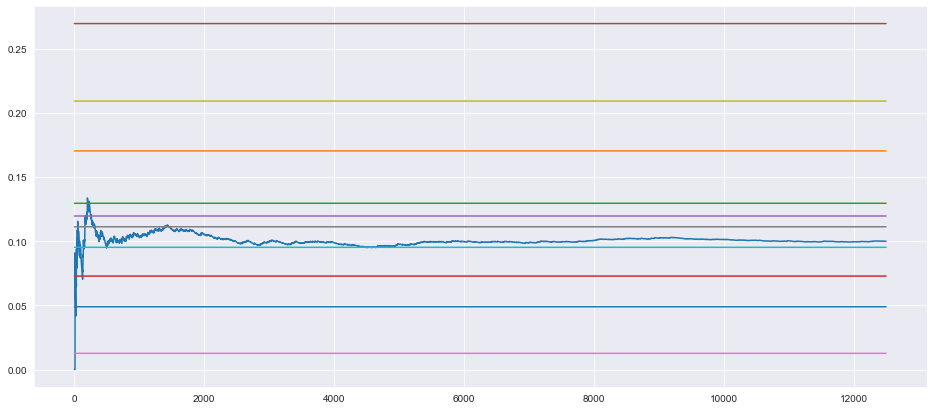

In [34]:
NUM_TRIALS = 12500        
EPS = 0.2                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation(df, EPS, BANDIT_PROBS, NUM_TRIALS)

Mean win rate estimate of bandit #1 : 0.008233460693971349

Mean win rate estimate of bandit #2 : 0.00987124143788975

Mean win rate estimate of bandit #3 : 0.002296375494900494

Mean win rate estimate of bandit #4 : 0.006053198052612983

Mean win rate estimate of bandit #5 : 0.010232732762435179

Mean win rate estimate of bandit #6 : 0.0005314512283676234

Mean win rate estimate of bandit #7 : 0.0015814251198679947

Mean win rate estimate of bandit #8 : 0.016082736202659553

Mean win rate estimate of bandit #9 : 0.0951183155554902

Mean win rate estimate of bandit #10 : 0.0006902841443346355

num_times_exploited : 8957
num_times_explored  : 1043
num_times_optimal   : 127
total_reward        : 976
total_reward_%      : 9.76%


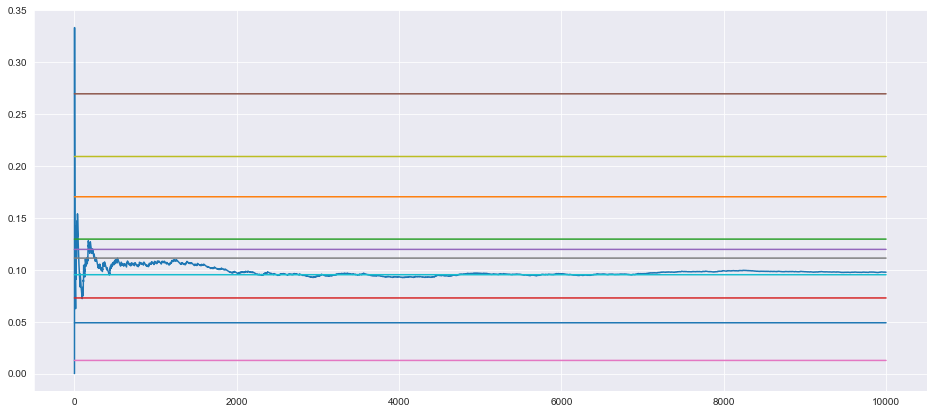

In [36]:
NUM_TRIALS = 10000        
EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation(df, EPS, BANDIT_PROBS, NUM_TRIALS)

### Try adaptive greedy to dataset above

In [37]:
def simulation_adaptive(df, BANDIT_PROBS, NUM_TRIALS):
    
    #initialize the NUM_TRIALS, based on the no. of ROWS of dataframe
    #NUM_TRIALS = df.shape[0]
    
    # Initialize bandits with win_rate_estimate as 0, based on the no. of COLS of dataframe
    WIN_RATE_ESTIMATE = [0 for i in range(df.shape[1])]
    
    # Recording the simulation
    rewards= []
    num_times_explored=0
    num_times_exploited=0
    num_times_optimal=0
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)
    
    #create a dictionary of counts
    dict_count = {}
    for i in range(10):
        dict_count['arm'+str(i+1)]=0
    
    for i in range(NUM_TRIALS):
        
        EPS = 1/(i+1)
        # Explore Scenario
        if np.random.random()<=EPS:
            
            num_times_explored += 1
            
            # Recording the bandit(s) other than the one with highest win rate estimate
            explore_idx = [index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate != max(WIN_RATE_ESTIMATE)]
            
            # Randomly selecting a bandit from those recorded bandits 
            if explore_idx:
                bandit_selected = np.random.choice(explore_idx)
            else:
                bandit_selected = np.random.choice([0,1])
            
            #update the count
            dict_count['arm'+str(bandit_selected+1)]+=1
                
        
        # Exploit Scenario
        else:
            
            num_times_exploited += 1
            
            # Selecting the bandit with the highest win rate estimate till now
            bandit_selected = np.random.choice([index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate == max(WIN_RATE_ESTIMATE)])
            
            #update the count
            dict_count['arm'+str(bandit_selected+1)]+=1
        
        
        # Update the optimal count
        if bandit_selected==optimal_bandit:
            num_times_optimal += 1
        
        # Pulling the arm of the selected bandit
        try:
            reward = df.iloc[dict_count['arm'+str(bandit_selected+1)],bandit_selected] 
        except IndexError:
            reward = 0
        
        #Recording the reward
        rewards.append(reward)
        
        #Updating the win rate estimate of the selected bandit after the iteration
        WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
 # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"num_times_exploited : {num_times_exploited}")
    print(f"num_times_explored  : {num_times_explored}")
    print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.0

Mean win rate estimate of bandit #2 : 0.12338671735210208

Mean win rate estimate of bandit #3 : 0

Mean win rate estimate of bandit #4 : 0

Mean win rate estimate of bandit #5 : 0.0

Mean win rate estimate of bandit #6 : 0.0

Mean win rate estimate of bandit #7 : 0.0

Mean win rate estimate of bandit #8 : 0

Mean win rate estimate of bandit #9 : 0.07692307692307693

Mean win rate estimate of bandit #10 : 0

num_times_exploited : 10491
num_times_explored  : 9
num_times_optimal   : 1
total_reward        : 1296
total_reward_%      : 12.34%


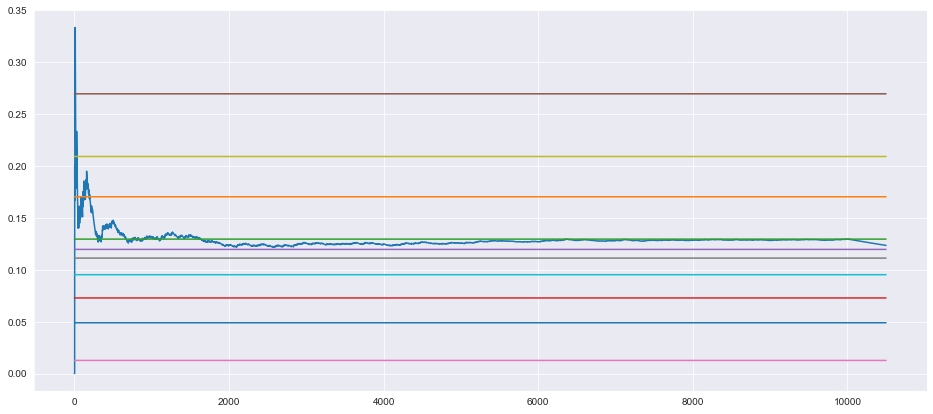

In [40]:
NUM_TRIALS = 10500        
#EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_adaptive(df, BANDIT_PROBS,NUM_TRIALS)

Mean win rate estimate of bandit #1 : 0.0

Mean win rate estimate of bandit #2 : 0.12346747202995614

Mean win rate estimate of bandit #3 : 0.0

Mean win rate estimate of bandit #4 : 0.0

Mean win rate estimate of bandit #5 : 0

Mean win rate estimate of bandit #6 : 0.0

Mean win rate estimate of bandit #7 : 0

Mean win rate estimate of bandit #8 : 0.0

Mean win rate estimate of bandit #9 : 0

Mean win rate estimate of bandit #10 : 0.0

num_times_exploited : 10489
num_times_explored  : 11
num_times_optimal   : 0
total_reward        : 1295
total_reward_%      : 12.33%


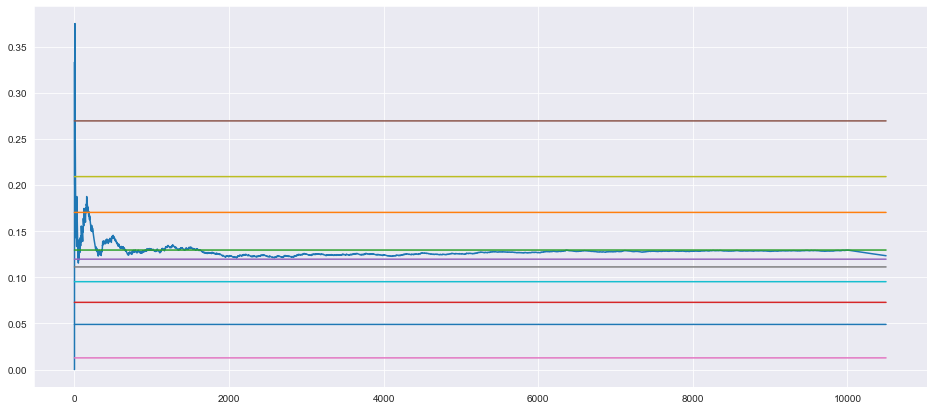

In [41]:
NUM_TRIALS = 10500        
#EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_adaptive(df, BANDIT_PROBS,NUM_TRIALS)

### Trying UCB1 to dataset above

In [42]:
def simulation_ucb(df, BANDIT_PROBS):
    #remember to import math
    import math
    
    #initialize the NUM_TRIALS, based on the no. of ROWS of dataframe
    NUM_TRIALS = df.shape[0]
    
    # Initialize bandits with win_rate_estimate as 0, based on the no. of COLS of dataframe
    WIN_RATE_ESTIMATE = [0 for i in range(df.shape[1])]
    
    # Recording the simulation
    rewards= []
    total_counts = 0
    num_times_optimal=0
    ucb_values = [0 for i in range(df.shape[1])]
    
    #create a dictionary of counts
    dict_count = {}
    for i in range(len(WIN_RATE_ESTIMATE)):
        dict_count['arm'+str(i+1)]=0
    
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)

    for i in range(NUM_TRIALS):
        
        #Try each arm once first 
        if i<=(df.shape[1]-1):
            bandit_selected = i 
            reward = df.iloc[dict_count['arm'+str(bandit_selected+1)],bandit_selected]    
            rewards.append(reward)
            WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
            total_counts+=1
            dict_count['arm'+str(bandit_selected+1)]+=1
            ucb_values[bandit_selected] = WIN_RATE_ESTIMATE[bandit_selected] + math.sqrt((2 * math.log(total_counts)) / float(dict_count['arm'+str(bandit_selected+1)]))
        
        
        #choose the max UCB each time 
        else:
            bandit_selected = np.argmax(ucb_values)
            reward = df.iloc[dict_count['arm'+str(bandit_selected+1)],bandit_selected] 
            rewards.append(reward)
            WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
            total_counts+=1
            dict_count['arm'+str(bandit_selected+1)]+=1
            
            #calculate the UCB values for all
            for index in range(len(WIN_RATE_ESTIMATE)):
                ucb_values[index] = WIN_RATE_ESTIMATE[index] + math.sqrt((2 * math.log(total_counts)) / float(dict_count['arm'+str(index+1)]))
        
        
        
        # Update the optimal count
        if bandit_selected==optimal_bandit:
            num_times_optimal += 1
                
     # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"total count : {total_counts}")
    print(ucb_values)
    #print(f"num_times_explored  : {num_times_explored}")
    print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.21424246290064405

Mean win rate estimate of bandit #2 : 0.06910211368565498

Mean win rate estimate of bandit #3 : 0.014853880122026916

Mean win rate estimate of bandit #4 : 0.032075180597129514

Mean win rate estimate of bandit #5 : 0.2298282024979196

Mean win rate estimate of bandit #6 : 0.002704457413714883

Mean win rate estimate of bandit #7 : 0.011645584201026966

Mean win rate estimate of bandit #8 : 0.07833047632689129

Mean win rate estimate of bandit #9 : 0.13491997184066742

Mean win rate estimate of bandit #10 : 0.007704173744064349

total count : 10000
[0.2941762734135438, 0.2940604782336062, 0.2936448256792554, 0.29375889632642327, 0.2941597562479856, 0.29405978977547725, 0.2940339810656582, 0.29400817699512516, 0.29409892066742216, 0.2938329772493107]
num_times_optimal   : 4451
total_reward        : 2022
total_reward_%      : 20.22%


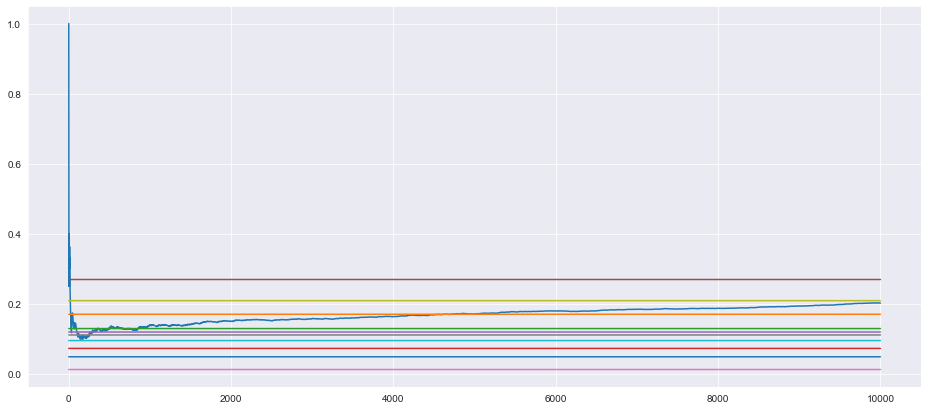

In [43]:
#NUM_TRIALS = 10000        
#EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(df, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.21424246290064405

Mean win rate estimate of bandit #2 : 0.06910211368565498

Mean win rate estimate of bandit #3 : 0.014853880122026916

Mean win rate estimate of bandit #4 : 0.032075180597129514

Mean win rate estimate of bandit #5 : 0.2298282024979196

Mean win rate estimate of bandit #6 : 0.002704457413714883

Mean win rate estimate of bandit #7 : 0.011645584201026966

Mean win rate estimate of bandit #8 : 0.07833047632689129

Mean win rate estimate of bandit #9 : 0.13491997184066742

Mean win rate estimate of bandit #10 : 0.007704173744064349

total count : 10000
[0.2941762734135438, 0.2940604782336062, 0.2936448256792554, 0.29375889632642327, 0.2941597562479856, 0.29405978977547725, 0.2940339810656582, 0.29400817699512516, 0.29409892066742216, 0.2938329772493107]
num_times_optimal   : 4451
total_reward        : 2022
total_reward_%      : 20.22%


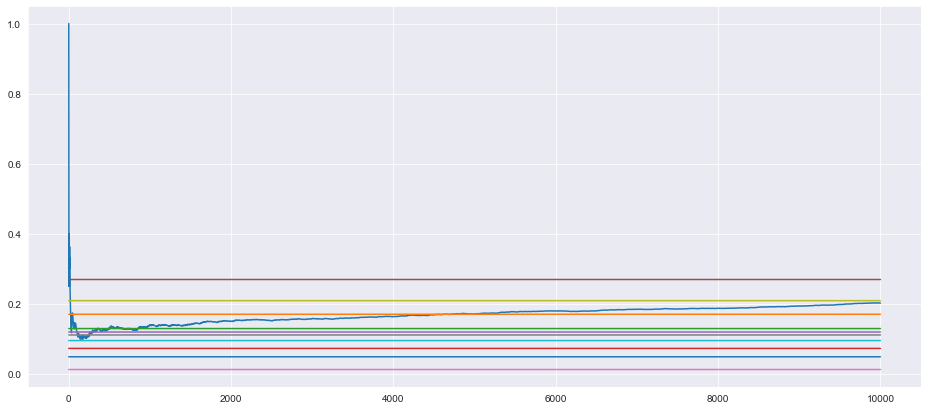

In [44]:
#NUM_TRIALS = 10000        
#EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [i for i in df.mean()] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(df, BANDIT_PROBS)

### Trying Epsilon greedy 

adapted code from : https://blog.devgenius.io/how-to-solve-the-multi-armed-bandit-problem-epsilon-greedy-approach-ebe286390578

In [39]:
NUM_TRIALS = 10000        
EPS = 0.2                  # Epsilon: Exploration factor
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)

In [36]:
def simulation(NUM_TRIALS, EPS, BANDIT_PROBS):
    # Initialize bandits with win_rate_estimate as 0
    WIN_RATE_ESTIMATE = [0, 0]
    
    # Recording the simulation
    rewards= []
    num_times_explored=0
    num_times_exploited=0
    num_times_optimal=0
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)

    for i in range(NUM_TRIALS):
        # Explore Scenario
        if np.random.random()<=EPS:
            
            num_times_explored += 1
            
            # Recording the bandit(s) other than the one with highest win rate estimate
            explore_idx = [index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate != max(WIN_RATE_ESTIMATE)]
            
            # Randomly selecting a bandit from those recorded bandits 
            if explore_idx:
                bandit_selected = np.random.choice(explore_idx)
            else:
                bandit_selected = np.random.choice([0,1])
                
        
        # Exploit Scenario
        else:
            
            num_times_exploited += 1
            
            # Selecting the bandit with the highest win rate estimate till now
            bandit_selected = np.random.choice([index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate == max(WIN_RATE_ESTIMATE)])
        
        
        # Update the optimal count
        if bandit_selected==optimal_bandit:
            num_times_optimal += 1
        
        
        # Pulling the arm of the selected bandit
        reward = np.random.random() < BANDIT_PROBS[bandit_selected]   #Reward here is true or false higher chance if bigger random 
        
        #Recording the reward
        rewards.append(reward)
        
        #Updating the win rate estimate of the selected bandit after the iteration
        WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
 # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"num_times_exploited : {num_times_exploited}")
    print(f"num_times_explored  : {num_times_explored}")
    print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.2440545125949798

Mean win rate estimate of bandit #2 : 0.5055170147646301

num_times_exploited : 8008
num_times_explored  : 1992
num_times_optimal   : 8005
total_reward        : 4538
total_reward_%      : 45.38%


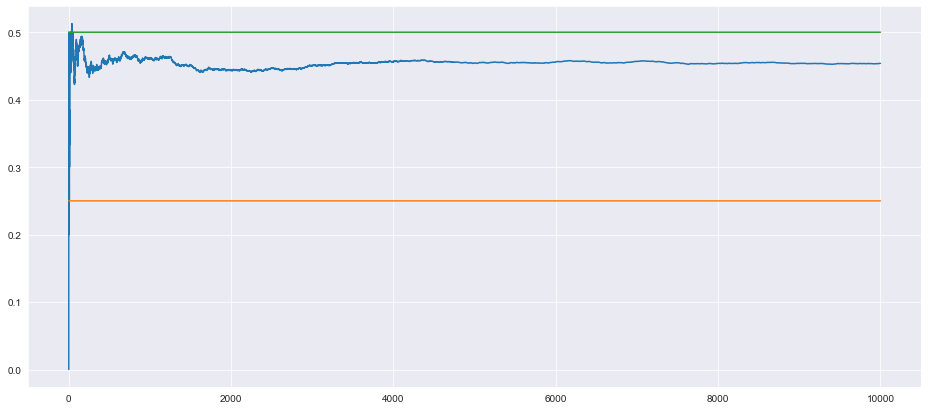

In [41]:
NUM_TRIALS = 10000        
EPS = 0.2                  # Epsilon: Exploration factor
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation(NUM_TRIALS, EPS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.1385553425607251

Mean win rate estimate of bandit #2 : 0.5000810610710595

num_times_exploited : 8948
num_times_explored  : 1052
num_times_optimal   : 8947
total_reward        : 4758
total_reward_%      : 47.58%


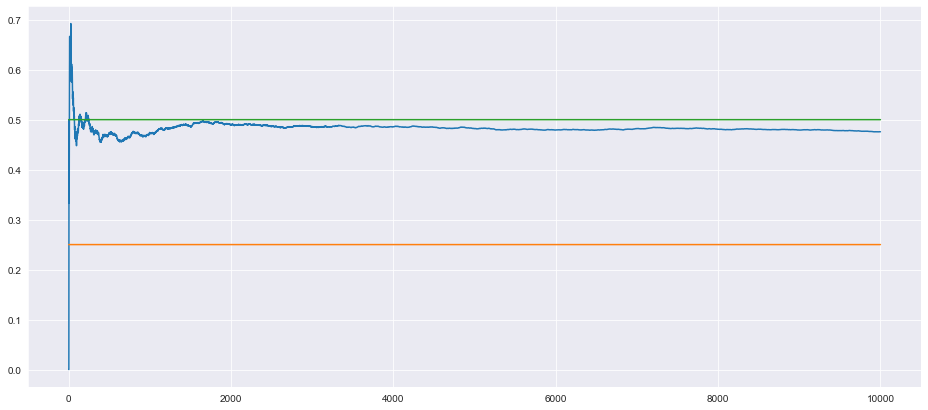

In [42]:
NUM_TRIALS = 10000        
EPS = 0.1                  # Epsilon: Exploration factor
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation(NUM_TRIALS, EPS, BANDIT_PROBS)

### Adaptive epsilon greedy 

In [45]:
def simulation_adaptive(NUM_TRIALS, BANDIT_PROBS):
    # Initialize bandits with win_rate_estimate as 0
    WIN_RATE_ESTIMATE = [0, 0]
    
    # Recording the simulation
    rewards= []
    num_times_explored=0
    num_times_exploited=0
    num_times_optimal=0
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)

    for i in range(NUM_TRIALS):
        # Explore Scenario
        EPS = 1/(i+1)
        if np.random.random()<=EPS:
            
            num_times_explored += 1
            
            # Recording the bandit(s) other than the one with highest win rate estimate
            explore_idx = [index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate != max(WIN_RATE_ESTIMATE)]
            
            # Randomly selecting a bandit from those recorded bandits 
            if explore_idx:
                bandit_selected = np.random.choice(explore_idx)
            else:
                bandit_selected = np.random.choice([0,1])
                
        
        # Exploit Scenario
        else:
            
            num_times_exploited += 1
            
            # Selecting the bandit with the highest win rate estimate till now
            bandit_selected = np.random.choice([index for index, win_rate in enumerate(WIN_RATE_ESTIMATE) if win_rate == max(WIN_RATE_ESTIMATE)])
        
        
        # Update the optimal count
        if bandit_selected==optimal_bandit:
            num_times_optimal += 1
        
        
        # Pulling the arm of the selected bandit
        reward = np.random.random() < BANDIT_PROBS[bandit_selected]   #Reward here is true or false higher chance if bigger random 
        
        #Recording the reward
        rewards.append(reward)
        
        #Updating the win rate estimate of the selected bandit after the iteration
        WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
 # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"num_times_exploited : {num_times_exploited}")
    print(f"num_times_explored  : {num_times_explored}")
    print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.12347350555423858

Mean win rate estimate of bandit #2 : 0.5001499043098313

num_times_exploited : 9993
num_times_explored  : 7
num_times_optimal   : 9994
total_reward        : 5001
total_reward_%      : 50.01%


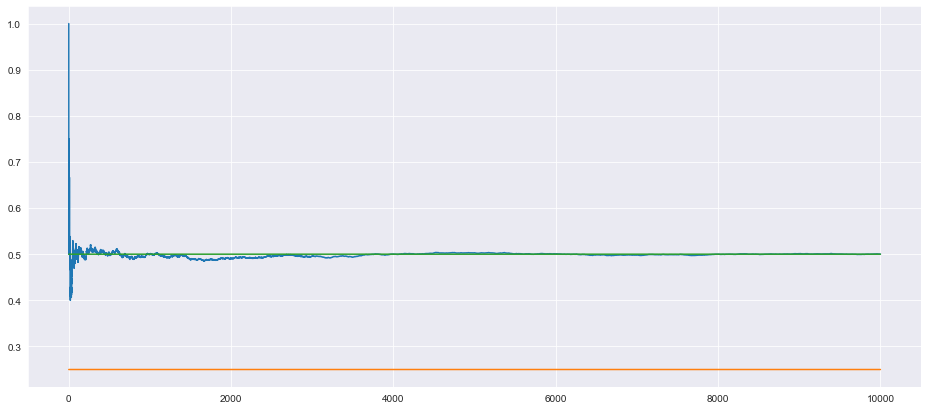

In [46]:
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_adaptive(NUM_TRIALS, BANDIT_PROBS)

Because it explores so little though! sometimes it picks the wrong arm!!

Mean win rate estimate of bandit #1 : 0.25778150147948303

Mean win rate estimate of bandit #2 : 0.1658096591839542

num_times_exploited : 9995
num_times_explored  : 5
num_times_optimal   : 4
total_reward        : 2579
total_reward_%      : 25.79%


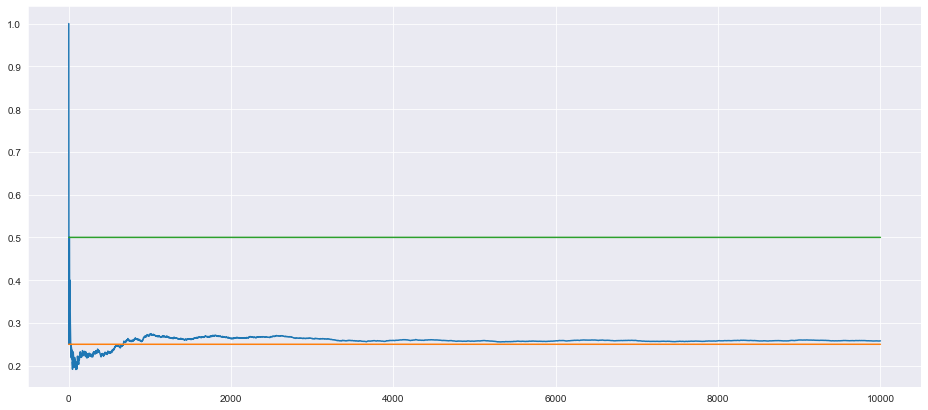

In [47]:
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_adaptive(NUM_TRIALS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.0

Mean win rate estimate of bandit #2 : 0.5031825843929945

num_times_exploited : 9995
num_times_explored  : 5
num_times_optimal   : 9994
total_reward        : 5030
total_reward_%      : 50.3%


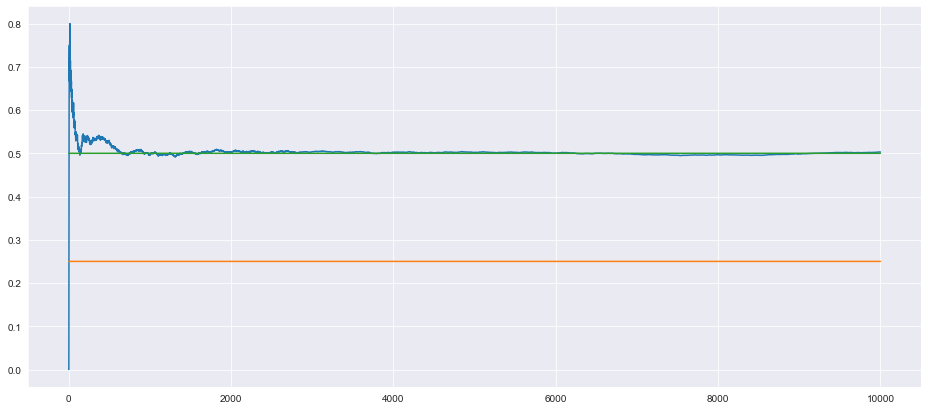

In [48]:
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_adaptive(NUM_TRIALS, BANDIT_PROBS)

### UCB1 

Some useful articles
https://medium.com/analytics-vidhya/multi-armed-bandit-analysis-of-upper-confidence-bound-algorithm-4b84be516047 

In [82]:
def simulation_ucb(NUM_TRIALS, BANDIT_PROBS):
    # Initialize bandits with win_rate_estimate as 0
    WIN_RATE_ESTIMATE = [0, 0]
    
    # Recording the simulation
    rewards= []
    total_counts = 0
    num_times_optimal=0
    ucb_values = [0,0]
    
    #create a dictionary of counts
    dict_count = {}
    for i in range(len(WIN_RATE_ESTIMATE)):
        dict_count['arm'+str(i+1)]=0
    
    
    # Recording the optimal bandit to check how many times the model selected this one
    optimal_bandit=np.argmax(BANDIT_PROBS)

    for i in range(NUM_TRIALS):
        
        #Try each arm once first 
        if i==0:
            bandit_selected = 0 
            reward = np.random.random() < BANDIT_PROBS[bandit_selected]  
            rewards.append(reward)
            WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
            total_counts+=1
            dict_count['arm'+str(bandit_selected+1)]+=1
            ucb_values[bandit_selected] = WIN_RATE_ESTIMATE[bandit_selected] + math.sqrt((2 * math.log(total_counts)) / float(dict_count['arm'+str(bandit_selected+1)]))
        
        #Try each arm once first 
        elif i==1:
            bandit_selected = 1 
            reward = np.random.random() < BANDIT_PROBS[bandit_selected]  
            rewards.append(reward)
            WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
            total_counts+=1
            dict_count['arm'+str(bandit_selected+1)]+=1
            ucb_values[bandit_selected] = WIN_RATE_ESTIMATE[bandit_selected] + math.sqrt((2 * math.log(total_counts)) / float(dict_count['arm'+str(bandit_selected+1)]))
        
        #choose the max UCB each time 
        else:
            bandit_selected = np.argmax(ucb_values)
            reward = np.random.random() < BANDIT_PROBS[bandit_selected]  
            rewards.append(reward)
            WIN_RATE_ESTIMATE[bandit_selected] += (reward-WIN_RATE_ESTIMATE[bandit_selected])/(i+2)
            total_counts+=1
            dict_count['arm'+str(bandit_selected+1)]+=1
            
            #calculate the UCB values for all
            for index in range(len(WIN_RATE_ESTIMATE)):
                ucb_values[index] = WIN_RATE_ESTIMATE[index] + math.sqrt((2 * math.log(total_counts)) / float(dict_count['arm'+str(index+1)]))
            
            
            
     # Showing the Results of the simulation
    for i in range(len(WIN_RATE_ESTIMATE)):
        print(f"Mean win rate estimate of bandit #{i+1} : {WIN_RATE_ESTIMATE[i]}\n")
    print(f"total count : {total_counts}")
    print(ucb_values)
    #print(f"num_times_explored  : {num_times_explored}")
    #print(f"num_times_optimal   : {num_times_optimal}")
    print(f"total_reward        : {sum(rewards)}")
    print(f"total_reward_%      : {round(sum(rewards)/len(rewards)*100, 2)}%") 
    
    cumulative_rewards=np.cumsum(rewards)
    
    win_rates=cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    
    sea.set_style("darkgrid")
    plt.figure(figsize=(16,7))
    plt.plot(win_rates)
    for b in BANDIT_PROBS:
        plt.plot(np.ones(NUM_TRIALS)*b)
    plt.show()       


Mean win rate estimate of bandit #1 : 0.2562447799113604

Mean win rate estimate of bandit #2 : 0.5056079794795687

total count : 10000
[0.5476001122731228, 0.5490006931926885]
num_times_optimal   : 0
total_reward        : 5007
total_reward_%      : 50.07%


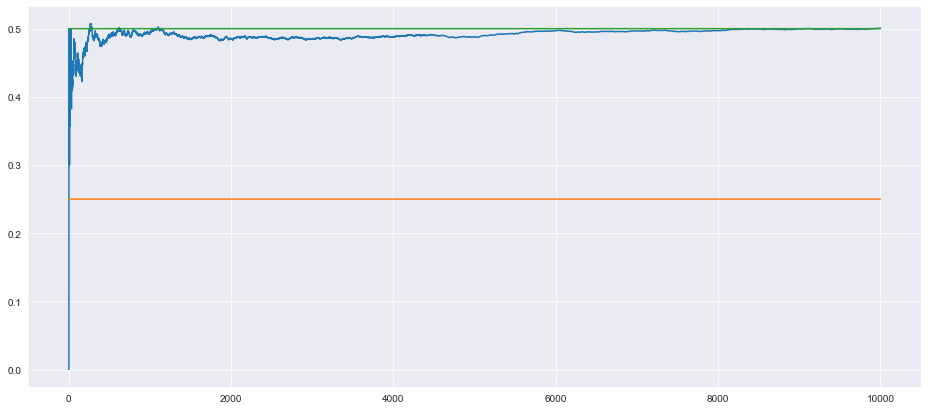

In [88]:
import math 
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(NUM_TRIALS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.2889561556669548

Mean win rate estimate of bandit #2 : 0.504431154133254

total count : 10000
[0.5468333599818054, 0.5479575487352006]
num_times_optimal   : 0
total_reward        : 4977
total_reward_%      : 49.77%


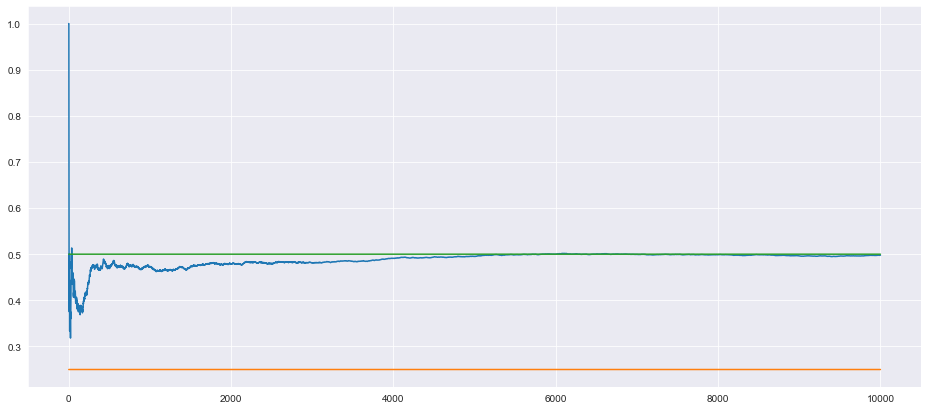

In [89]:
import math 
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(NUM_TRIALS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.10873727700715016

Mean win rate estimate of bandit #2 : 0.49237334695858354

total count : 10000
[0.5337018746555131, 0.535513244877778]
num_times_optimal   : 0
total_reward        : 4900
total_reward_%      : 49.0%


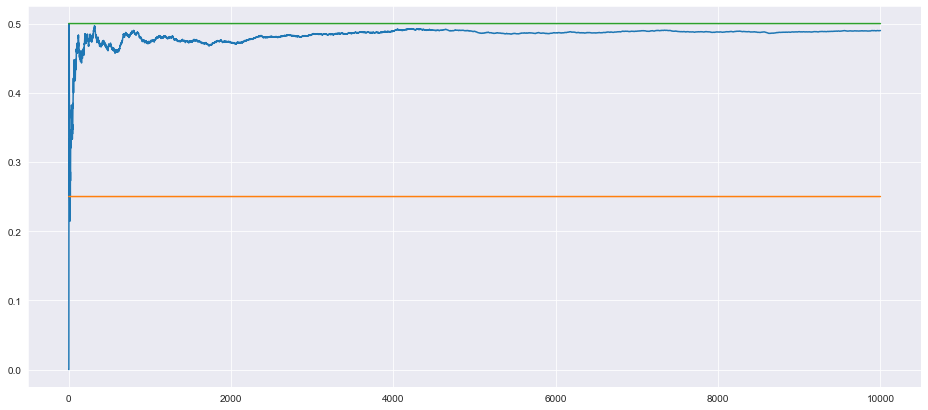

In [90]:
import math 
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.5] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(NUM_TRIALS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.10915187658057333

Mean win rate estimate of bandit #2 : 0.3438415084244278

total count : 10000
[0.38677388220723274, 0.38728309532672844]
num_times_optimal   : 0
total_reward        : 3410
total_reward_%      : 34.1%


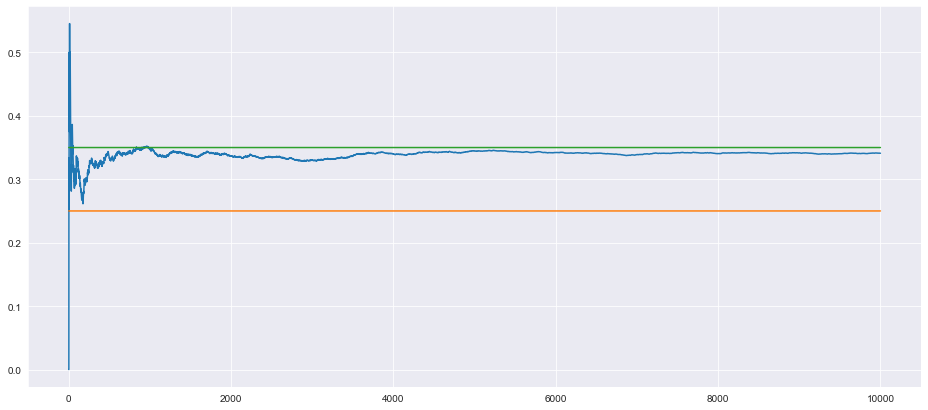

In [91]:
import math 
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.25, 0.35] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(NUM_TRIALS, BANDIT_PROBS)

Mean win rate estimate of bandit #1 : 0.3412390695071497

Mean win rate estimate of bandit #2 : 0.2657623762549888

total count : 10000
[0.38713749243096046, 0.38686624526475266]
num_times_optimal   : 0
total_reward        : 3324
total_reward_%      : 33.24%


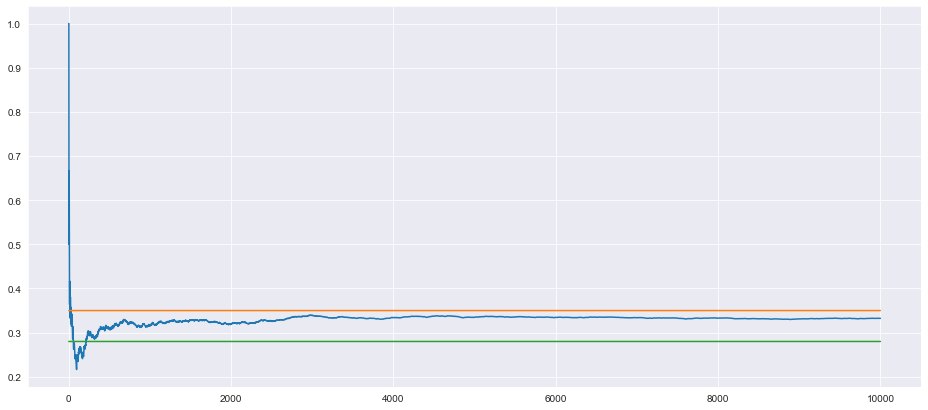

In [92]:
import math 
NUM_TRIALS = 10000        
#EPS = 0.1                  # No need epsilon anymore
BANDIT_PROBS = [0.35, 0.28] # Actual Win rates of the bandits (Unknown)


if __name__=="__main__":
    simulation_ucb(NUM_TRIALS, BANDIT_PROBS)